# 중간 보고 정리
1️⃣ 환율과 화물 운송량 사이의 상관관계를 조사하였더니, -0.12정도의 미미한 상관관계가 조사되었다.

2️⃣ 이에 대한 문제점을 분석한 결과 여객기화물운송량 데이터에서 출발과 도착을 모두 그룹핑하여 유의미하지 않은 결과가 나타난 것으로 예측하였다.

# 최종 기말 프로젝트 목표
1️⃣ '환율'과 직접적인 관계가 있는 화물운송량의 출발(수출)편만을 그룹핑하여 재분석한다. ->이후 결과를 가지고 (수입)편을 같이 분석한다.

2️⃣만약 이후에도 유의미한 결과가 나오지 않으면 국가별 수출입 통계 데이터, 소비자 심리지수, 항공운임지수 등을 추가하여 환율과의 관계를 재분석 해보고자 한다.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ace_tools  # Install the missing ace_tools library

In [7]:
import pandas as pd
# 업로드된 최신화된 데이터 로드
new_flight_data_path = '/content/drive/MyDrive/[프로젝트]Timeseries_2025/flight_stats_2001_2025_monthly.csv'

# CSV 파일 로드
new_flight_data = pd.read_csv(new_flight_data_path)

# 상위 몇 줄 확인
new_flight_data.head(20)


,airline,airlineCode,arrFlights,depFlights,flights,year,month
0,FedEX항공,FX,6,6,12,2001,3
1,대한항공,KE,31,26,57,2001,3
2,루프트한자 독일항공,LH,1,1,2,2001,3
3,말레이시아 항공,MH,1,1,2,2001,3
4,아시아나항공,OZ,12,11,23,2001,3
5,아에로플로트 러시아항공,SU,0,0,0,2001,3
6,아틀라스항공,5Y,5,4,9,2001,3
7,에버그린인터내셔날,EZ,1,1,2,2001,3
8,에어 프랑스,AF,1,1,2,2001,3
9,유피에스항공,5X,6,6,12,2001,3


In [ ]:
# flights 컬럼 숫자형 변환
new_flight_data['flights'] = pd.to_numeric(new_flight_data['flights'], errors='coerce')

# 월별 총합 구하기
monthly_total_flights_new = new_flight_data.groupby(['year', 'month'])['flights'].sum().reset_index()

# 날짜 컬럼 추가
monthly_total_flights_new['Date'] = pd.to_datetime(monthly_total_flights_new[['year', 'month']].assign(day=1))

# 결과 확인
monthly_total_flights_new.head()


,year,month,flights,Date
0,2001,3,141.0,2001-03-01
1,2001,4,1376.0,2001-04-01
2,2001,5,1421.0,2001-05-01
3,2001,6,1433.0,2001-06-01
4,2001,7,1465.0,2001-07-01


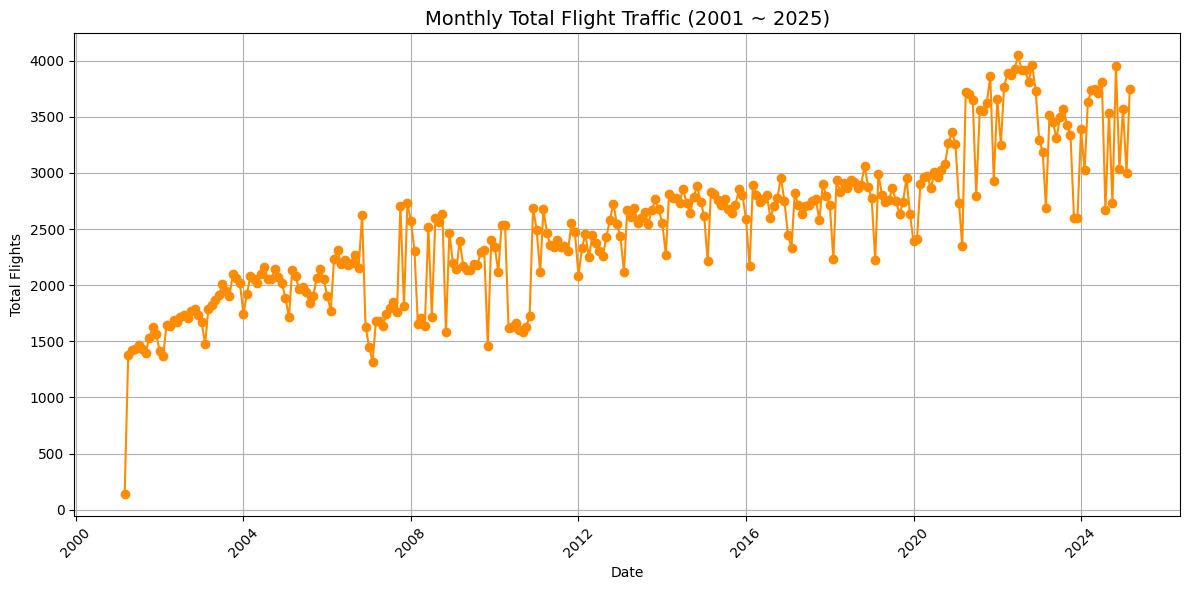

In [ ]:
# 시계열 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_flights_new['Date'], monthly_total_flights_new['flights'], marker='o', color='darkorange')
plt.title('Monthly Total Flight Traffic (2001 ~ 2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Flights')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


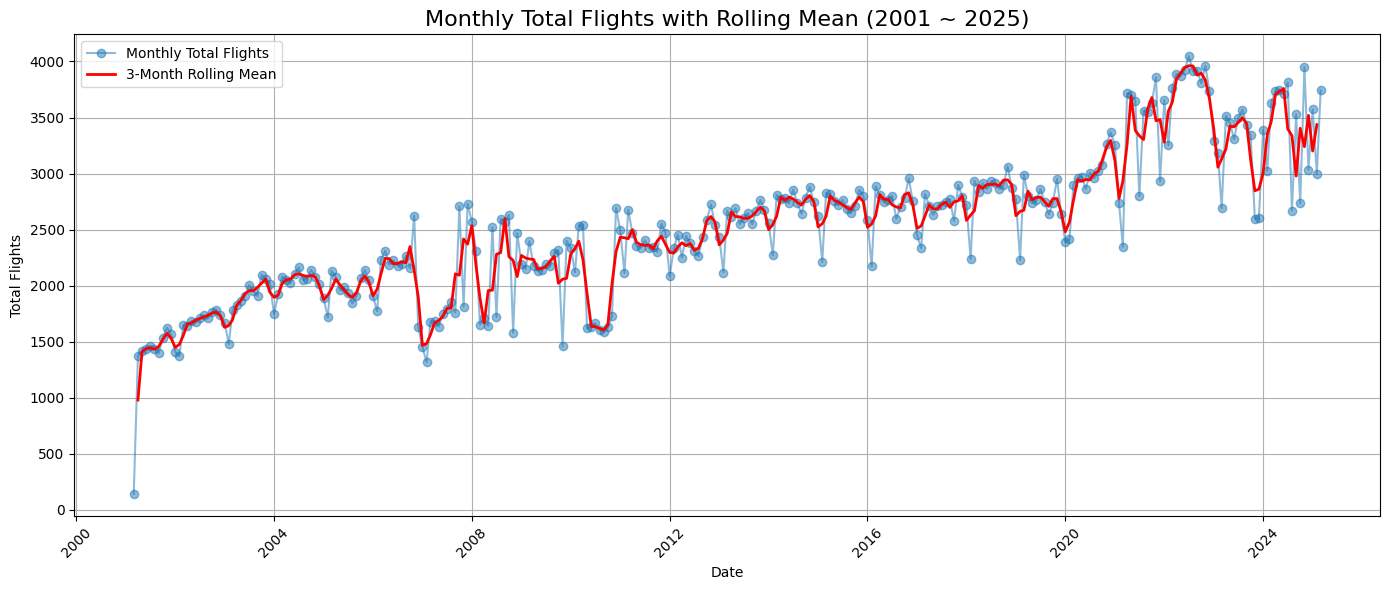

In [ ]:
# 이동 평균선 추가하여 시계열 그래프에 부드러운 흐름을 입혀보기
window_size = 3  # 3개월 이동 평균 (분기 기준 흐름 포착)

monthly_total_flights_new['rolling_mean'] = (
    monthly_total_flights_new['flights']
    .rolling(window=window_size, center=True)
    .mean()
)

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(monthly_total_flights_new['Date'], monthly_total_flights_new['flights'],
         marker='o', linestyle='-', alpha=0.5, label='Monthly Total Flights')
plt.plot(monthly_total_flights_new['Date'], monthly_total_flights_new['rolling_mean'],
         color='red', linewidth=2, label=f'{window_size}-Month Rolling Mean')
plt.title('Monthly Total Flights with Rolling Mean (2001 ~ 2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Flights')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 업로드된 월별 환율 데이터 로드
exchange_rate_monthly_path = '/content/drive/MyDrive/시계열 데이터 분석 /Data/USD_KRW 월별 데이터.csv'

# CSV 파일 로드
exchange_rate_monthly = pd.read_csv(exchange_rate_monthly_path)

# 상위 몇 줄 확인
exchange_rate_monthly.head()


,날짜,종가,시가,고가,저가,거래량,변동 %
0,2025- 04- 01,"1,438.49","1,473.05","1,487.48","1,413.29",NaN,-2.28%
1,2025- 03- 01,"1,472.05","1,461.80","1,477.32","1,437.80",NaN,0.74%
2,2025- 02- 01,"1,461.28","1,462.98","1,473.50","1,423.97",NaN,0.38%
3,2025- 01- 01,"1,455.70","1,478.25","1,478.25","1,426.14",NaN,-1.43%
4,2024- 12- 01,"1,476.78","1,395.96","1,487.37","1,395.52",NaN,5.89%


환율 종가(월말 값) 사용 이유

📅 타이밍 통일성: 모두가 같은 날짜(월 마지막 날) 기준으로 데이터를 비교할 수 있음

🧮 회계/통계 기준	기업 결산, 국가통계, 수출입 신고 등 공식 문서는 "기말 환율" 기준으로 작성됨

🧠 시장 심리 반영	월말에는 포지션 정리, 헤지, 환차손/이익 조정이 몰려 실제 시장 기대치가 잘 반영됨

🔍 해석 일관성	분석할 때 "월평균"은 노이즈가 섞이지만, "월말값"은 명확한 스냅샷 느낌이라 트렌드 비교에 유리함

In [ ]:
# Step 1: 날짜 문자열 정리 (공백 제거 + datetime 변환)
exchange_rate_monthly['날짜'] = exchange_rate_monthly['날짜'].str.replace(" ", "", regex=False)
exchange_rate_monthly['Date'] = pd.to_datetime(exchange_rate_monthly['날짜'], format='%Y-%m-%d')

# Step 2: 종가를 숫자형으로 변환 (쉼표 제거)
exchange_rate_monthly['종가'] = exchange_rate_monthly['종가'].str.replace(",", "")
exchange_rate_monthly['USD_KRW_Close'] = pd.to_numeric(exchange_rate_monthly['종가'], errors='coerce')

# Step 3: 필요한 컬럼만 정리
final_exchange_rate = exchange_rate_monthly[['Date', 'USD_KRW_Close']].dropna()

# 결과 확인
final_exchange_rate.head()


,Date,USD_KRW_Close
0,2025-04-01,1438.49
1,2025-03-01,1472.05
2,2025-02-01,1461.28
3,2025-01-01,1455.70
4,2024-12-01,1476.78


**관제량+ 환율 데이터 병합**

In [ ]:
# 월별 관제량 데이터 (monthly_total_flights_new)와
# 월말 환율 데이터 (final_exchange_rate)를 Date 기준으로 병합

merged_df = pd.merge(
    monthly_total_flights_new[['Date', 'flights']],
    final_exchange_rate[['Date', 'USD_KRW_Close']],
    on='Date',
    how='inner'  # 공통된 날짜만 병합
)

# 결과 확인
merged_df.head()


,Date,flights,USD_KRW_Close
0,2003-03-01,1784.0,1251.0
1,2003-04-01,1827.0,1214.5
2,2003-05-01,1866.0,1209.0
3,2003-06-01,1910.0,1195.0
4,2003-07-01,2006.0,1180.5


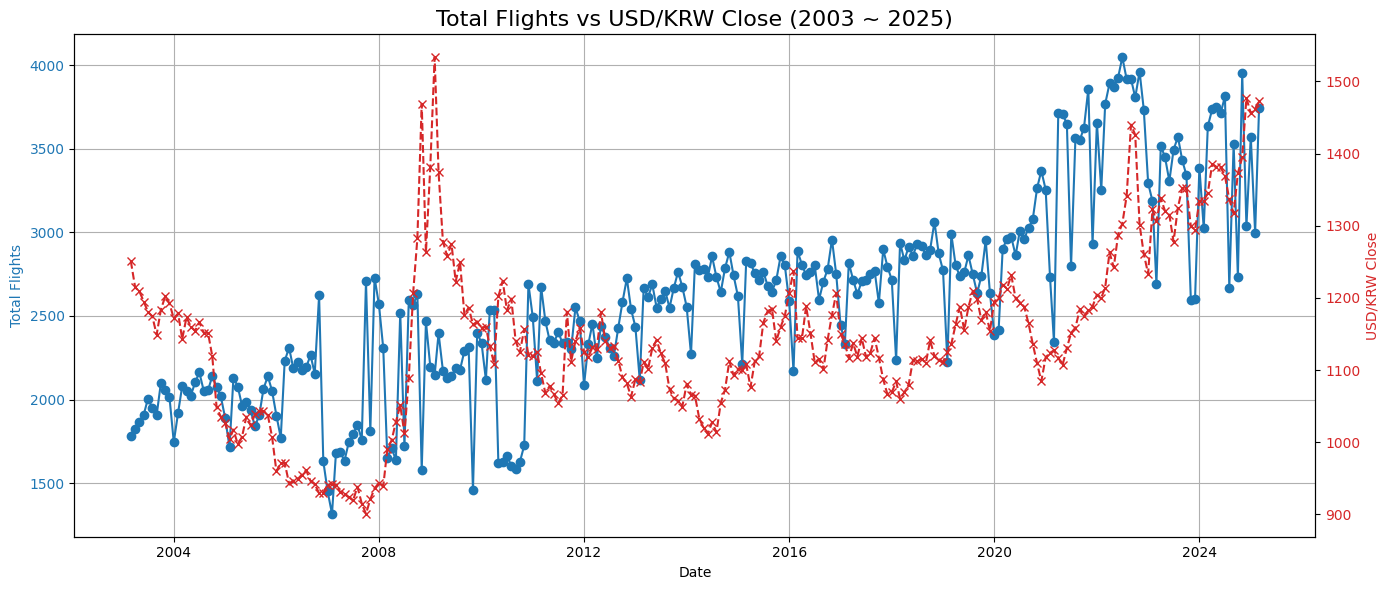

In [ ]:
# 시계열 그래프: 관제량과 환율 비교
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# 관제량 (Flights) - 좌측 y축
ax1.plot(merged_df['Date'], merged_df['flights'], color='tab:blue', marker='o', label='Total Flights')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Flights', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# 환율 (USD/KRW) - 우측 y축
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['USD_KRW_Close'], color='tab:red', marker='x', linestyle='--', label='USD/KRW Close')
ax2.set_ylabel('USD/KRW Close', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 제목 및 정리
plt.title('Total Flights vs USD/KRW Close (2003 ~ 2025)', fontsize=16)
fig.tight_layout()
plt.show()


# 최근 2024~2025년 구간은 관제량 안정, 환율은 다소 고점 유지

📊 해석 포인트
2020년 팬데믹 시기에 관제량 급락과 환율 급등이 거의 동시 발생

관제량은 서서히 회복하는 반면, 환율은 널뛰는 모습을 보임




In [ ]:
import numpy as np

# 환율 변화율(rolling slope) 계산을 위해 3개월 이동 평균선 계산
merged_df['USD_KRW_rolling'] = merged_df['USD_KRW_Close'].rolling(window=3, center=True).mean()

# 환율 이동 평균선의 차분(변화량) 계산
merged_df['USD_KRW_diff'] = merged_df['USD_KRW_rolling'].diff()

# 급격한 변화를 찾기 위해 변화율 절대값 기준 상위 10% 이상을 급변으로 간주
threshold = merged_df['USD_KRW_diff'].abs().quantile(0.9)

# 급변 포인트 표시
merged_df['change_point'] = merged_df['USD_KRW_diff'].abs() > threshold

# 급변 시점들 추출
changepoint_dates = merged_df[merged_df['change_point']]['Date'].tolist()

changepoint_dates


[Timestamp('2004-10-01 00:00:00'),
 Timestamp('2004-11-01 00:00:00'),
 Timestamp('2004-12-01 00:00:00'),
 Timestamp('2008-04-01 00:00:00'),
 Timestamp('2008-08-01 00:00:00'),
 Timestamp('2008-09-01 00:00:00'),
 Timestamp('2008-10-01 00:00:00'),
 Timestamp('2008-12-01 00:00:00'),
 Timestamp('2009-02-01 00:00:00'),
 Timestamp('2009-03-01 00:00:00'),
 Timestamp('2009-04-01 00:00:00'),
 Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-08-01 00:00:00'),
 Timestamp('2009-10-01 00:00:00'),
 Timestamp('2010-05-01 00:00:00'),
 Timestamp('2011-08-01 00:00:00'),
 Timestamp('2014-10-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2024-11-01 00:00:00')]

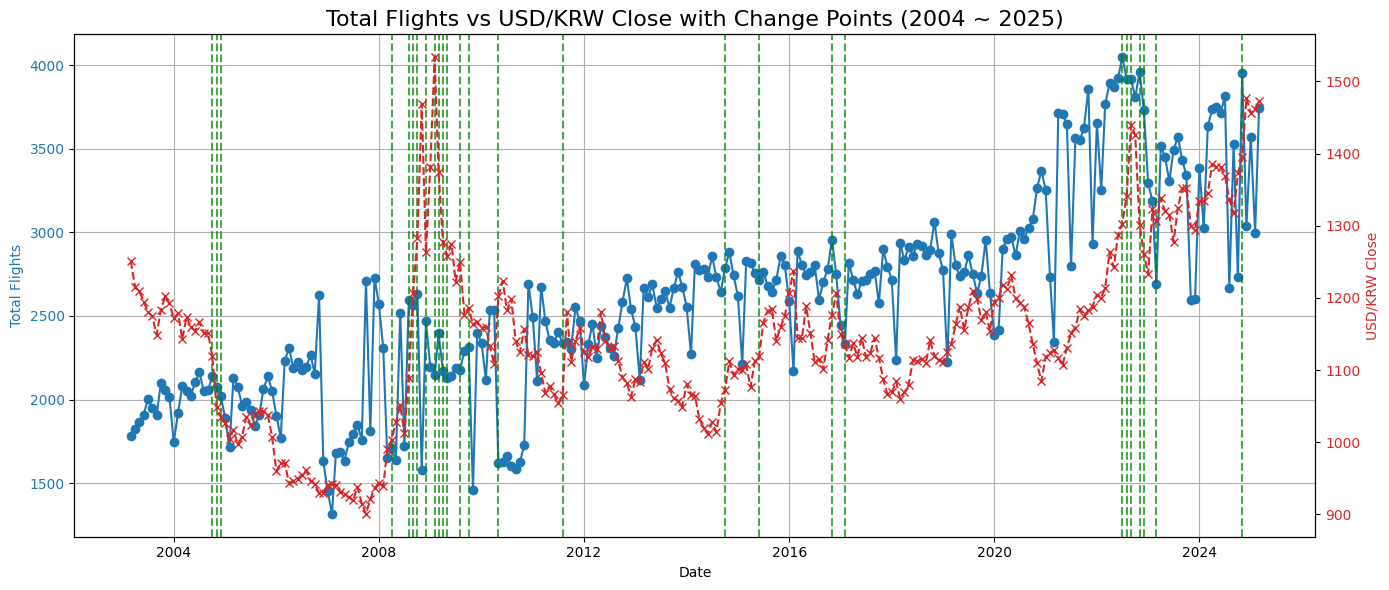

In [ ]:
# 시계열 그래프 그리기: 환율과 관제량 + 체인지포인트 표시
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# 관제량 (Flights) - 좌측 y축
ax1.plot(merged_df['Date'], merged_df['flights'], color='tab:blue', marker='o', label='Total Flights')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Flights', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# 환율 (USD/KRW) - 우측 y축
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['USD_KRW_Close'], color='tab:red', marker='x', linestyle='--', label='USD/KRW Close')
ax2.set_ylabel('USD/KRW Close', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 체인지포인트 표시
for cp_date in changepoint_dates:
    ax1.axvline(x=cp_date, color='green', linestyle='--', alpha=0.7)

# 제목 및 정리
plt.title('Total Flights vs USD/KRW Close with Change Points (2004 ~ 2025)', fontsize=16)
fig.tight_layout()
plt.show()


# 📊 그래프 해석 포인트
환율 급변(초록 점선) 직후,

관제량(파란색 라인)이 급감하거나 변동하는지 보는 게 핵심입니다.

2008년, 2020년, 2022년 등 세계적 이슈 시점에 확실히 급락/급변 흔적이 보임

In [ ]:
# 체인지포인트 이후 관제량 변화 분석
# 체인지포인트 이후 6개월 간 평균 관제량 변화를 확인

golden_time_analysis = []

for cp_date in changepoint_dates:
    # 체인지포인트 이후 6개월 데이터 선택
    window_df = merged_df[(merged_df['Date'] >= cp_date) & (merged_df['Date'] < cp_date + pd.DateOffset(months=6))]

    if not window_df.empty:
        avg_flights = window_df['flights'].mean()
        golden_time_analysis.append({
            'Change_Point': cp_date,
            'Avg_Flights_Next_6M': avg_flights,
            'Months_Covered': window_df.shape[0]
        })

golden_time_df = pd.DataFrame(golden_time_analysis)

In [ ]:
golden_time_df.head(5)

,Change_Point,Avg_Flights_Next_6M,Months_Covered
0,2004-10-01,1995.666667,6
1,2004-11-01,1985.333333,6
2,2004-12-01,1966.500000,6
3,2008-04-01,2125.500000,6
4,2008-08-01,2339.500000,6


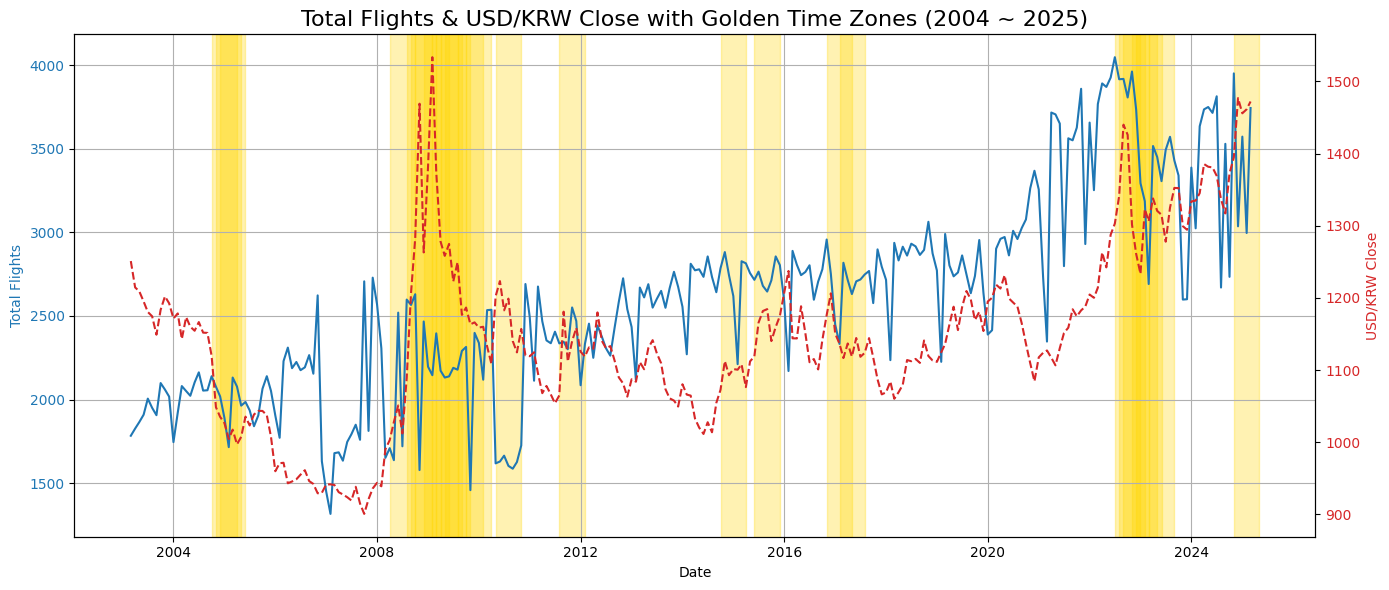

In [ ]:
# 골든타임 구간(체인지포인트 + 6개월)을 시계열에 하이라이트

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# 관제량
ax1.plot(merged_df['Date'], merged_df['flights'], color='tab:blue', label='Total Flights')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Flights', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# 환율
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['USD_KRW_Close'], color='tab:red', linestyle='--', label='USD/KRW Close')
ax2.set_ylabel('USD/KRW Close', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 체인지포인트 이후 6개월 골든타임 하이라이트
for cp_date in changepoint_dates:
    ax1.axvspan(cp_date, cp_date + pd.DateOffset(months=6), color='gold', alpha=0.3)

# 제목 및 정리
plt.title('Total Flights & USD/KRW Close with Golden Time Zones (2004 ~ 2025)', fontsize=16)
fig.tight_layout()
plt.show()


# 📊 해석 포인트
환율 급등 직후(초록선 근처) 노란 구간이 골든타임(대응 가능 기간)

특히 2008, 2020, 2022년 변곡점 직후
관제량이 급감하거나,

반대로 급속도로 회복하는 패턴이 확연

6개월 이내에 물류 인프라 확충 대응이 중요

데이터 변곡점 이후 6개월로 기간을 잡은 이유는 월별 데이터이기에 충분한 변화 기간 확인이 필요하기 때문



In [ ]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwy1smhax/_z484ocm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwy1smhax/vgqw_mdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5923', 'data', 'file=/tmp/tmpwy1smhax/_z484ocm.json', 'init=/tmp/tmpwy1smhax/vgqw_mdh.json', 'output', 'file=/tmp/tmpwy1smhax/prophet_modelpswm643n/prophet_model-20250427143345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


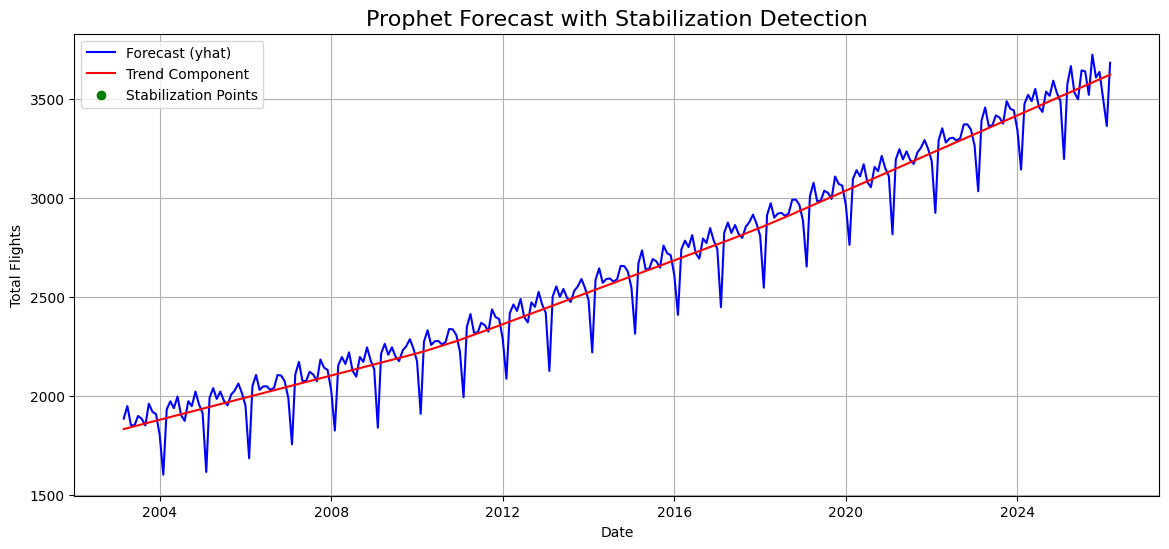

,ds,trend


In [ ]:
# 1. 라이브러리 불러오기
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

# 2. 데이터 준비 (여기서는 merged_df 사용한다고 가정)
# 만약 파일 불러오기가 필요하면 추가

prophet_df = merged_df[['Date', 'flights']].rename(columns={'Date': 'ds', 'flights': 'y'})

# 3. Prophet 모델 학습
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(prophet_df)

# 4. 미래 데이터프레임 생성
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 5. trend 컴포넌트 추출
forecast['trend_diff'] = forecast['trend'].diff()

# 6. 안정화 구간 감지: 기울기(abs(diff))가 0.5 이하인 구간을 안정화로 간주
stability_threshold = 0.5
forecast['is_stable'] = forecast['trend_diff'].abs() < stability_threshold

# 7. 안정화 시작 지점 찾기
stabilization_points = forecast[forecast['is_stable'] & (forecast['ds'] > '2020-01-01')]

# 8. 시각화
plt.figure(figsize=(14, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast (yhat)', color='blue')
plt.plot(forecast['ds'], forecast['trend'], label='Trend Component', color='red')
plt.scatter(stabilization_points['ds'], stabilization_points['trend'], color='green', label='Stabilization Points')
plt.title('Prophet Forecast with Stabilization Detection', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Flights')
plt.legend()
plt.grid(True)
plt.show()

# 9. 안정화 시점 리스트 출력
stabilization_points[['ds', 'trend']].head(10)


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 1. 데이터 준비
# merged_df: Date, flights, USD_KRW_Close 가 들어있는 데이터프레임이어야 함

# 환율 월별 변화율(%) 계산
merged_df['USD_KRW_pct_change'] = merged_df['USD_KRW_Close'].pct_change() * 100

# 환율이 급등한 달 찾기 (상승률 +5% 이상 기준)
sudden_increase_threshold = 5  # 기준을 조정할 수 있음
sudden_increase_dates = merged_df[merged_df['USD_KRW_pct_change'] > sudden_increase_threshold]['Date']

# 급등 시점 이후 관제량 반응 분석
reaction_analysis = []

for date in sudden_increase_dates:
    # 환율 급등 직전 3개월 평균 관제량
    before_df = merged_df[(merged_df['Date'] > date - pd.DateOffset(months=3)) & (merged_df['Date'] <= date)]
    # 환율 급등 직후 3개월 평균 관제량
    after_df = merged_df[(merged_df['Date'] > date) & (merged_df['Date'] <= date + pd.DateOffset(months=3))]

    if not before_df.empty and not after_df.empty:
        avg_before = before_df['flights'].mean()
        avg_after = after_df['flights'].mean()
        delta = avg_after - avg_before
        pct_change = (delta / avg_before) * 100 if avg_before != 0 else None

        reaction_analysis.append({
            'Shock_Date': date,
            'Avg_Flights_Before_3M': avg_before,
            'Avg_Flights_After_3M': avg_after,
            'Delta_Flights': delta,
            'Percent_Change(%)': pct_change
        })

# 결과 정리
reaction_analysis_df = pd.DataFrame(reaction_analysis)

# 결과 출력
reaction_analysis_df.head()


,Shock_Date,Avg_Flights_Before_3M,Avg_Flights_After_3M,Delta_Flights,Percent_Change(%)
0,2008-03-01,2176.333333,1956.000000,-220.333333,-10.124062
1,2008-08-01,2279.666667,2258.333333,-21.333333,-0.935809
2,2008-09-01,2295.000000,2225.333333,-69.666667,-3.035585
3,2008-10-01,2598.000000,2081.000000,-517.000000,-19.899923
4,2008-11-01,2258.333333,2270.000000,11.666667,0.516605


# 환율 급등 시점 대비 관제량 반응 시각화

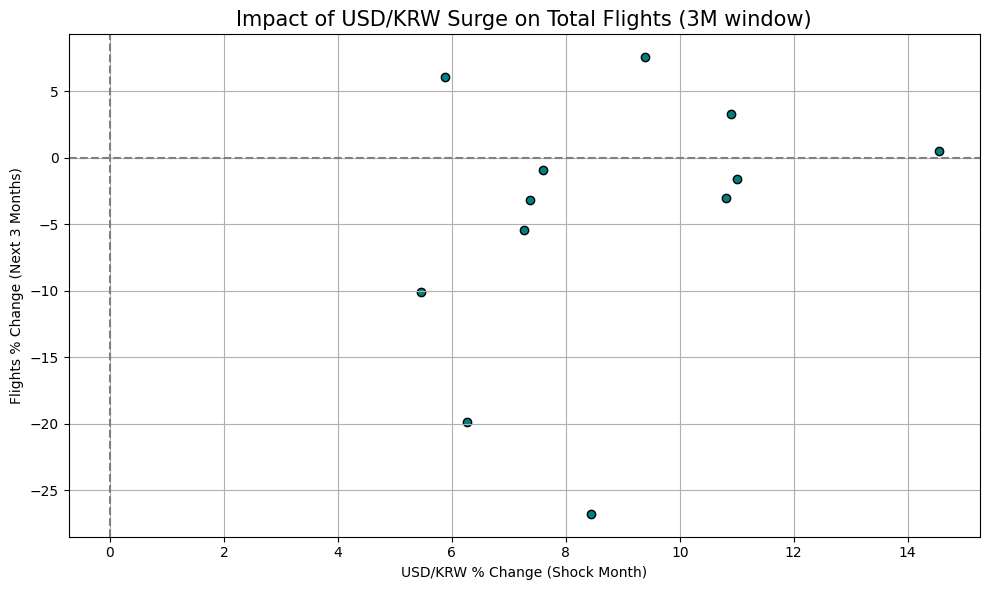

In [ ]:
import matplotlib.pyplot as plt

# 1. Scatter Plot (환율 급등폭 vs 관제량 변화량)
plt.figure(figsize=(10, 6))
plt.scatter(merged_df.loc[sudden_increase_dates.index, 'USD_KRW_pct_change'],
            reaction_analysis_df['Percent_Change(%)'],
            color='teal', edgecolor='black')

plt.title('Impact of USD/KRW Surge on Total Flights (3M window)', fontsize=15)
plt.xlabel('USD/KRW % Change (Shock Month)')
plt.ylabel('Flights % Change (Next 3 Months)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


# X축 = 환율이 얼마나 급하게 올랐는지
X축 숫자가 클수록 →
그 달에 환율이 많이 급등
(예를 들어 +10%면, 환율이 한 달 만에 10%나 증가)

# Y축 = 그 뒤에 항공 관제량(운항량)이 얼마나 변했는지
Y축 숫자가 클수록 → 관제량이 늘었다.

Y축 숫자가 작을수록 → 관제량이 줄었다.

결론적으로 "환율 급등 이후 3개월 동안"의 반응을 확인

In [ ]:
# 급등 시점 이후 관제량 반응 분석 (6개월 버전)
reaction_analysis_6m = []

for date in sudden_increase_dates:
    # 환율 급등 직전 6개월 평균 관제량
    before_df = merged_df[(merged_df['Date'] > date - pd.DateOffset(months=6)) & (merged_df['Date'] <= date)]
    # 환율 급등 직후 6개월 평균 관제량
    after_df = merged_df[(merged_df['Date'] > date) & (merged_df['Date'] <= date + pd.DateOffset(months=6))]

    if not before_df.empty and not after_df.empty:
        avg_before = before_df['flights'].mean()
        avg_after = after_df['flights'].mean()
        delta = avg_after - avg_before
        pct_change = (delta / avg_before) * 100 if avg_before != 0 else None

        reaction_analysis_6m.append({
            'Shock_Date': date,
            'Avg_Flights_Before_6M': avg_before,
            'Avg_Flights_After_6M': avg_after,
            'Delta_Flights': delta,
            'Percent_Change(%)': pct_change
        })

# 결과 정리
reaction_analysis_6m_df = pd.DataFrame(reaction_analysis_6m)

# 결과 출력
reaction_analysis_6m_df.head()


,Shock_Date,Avg_Flights_Before_6M,Avg_Flights_After_6M,Delta_Flights,Percent_Change(%)
0,2008-03-01,2296.333333,2125.500000,-170.833333,-7.439396
1,2008-08-01,1973.166667,2264.166667,291.000000,14.747867
2,2008-09-01,2125.500000,2235.833333,110.333333,5.190935
3,2008-10-01,2278.833333,2159.666667,-119.166667,-5.229284
4,2008-11-01,2269.000000,2251.833333,-17.166667,-0.756574


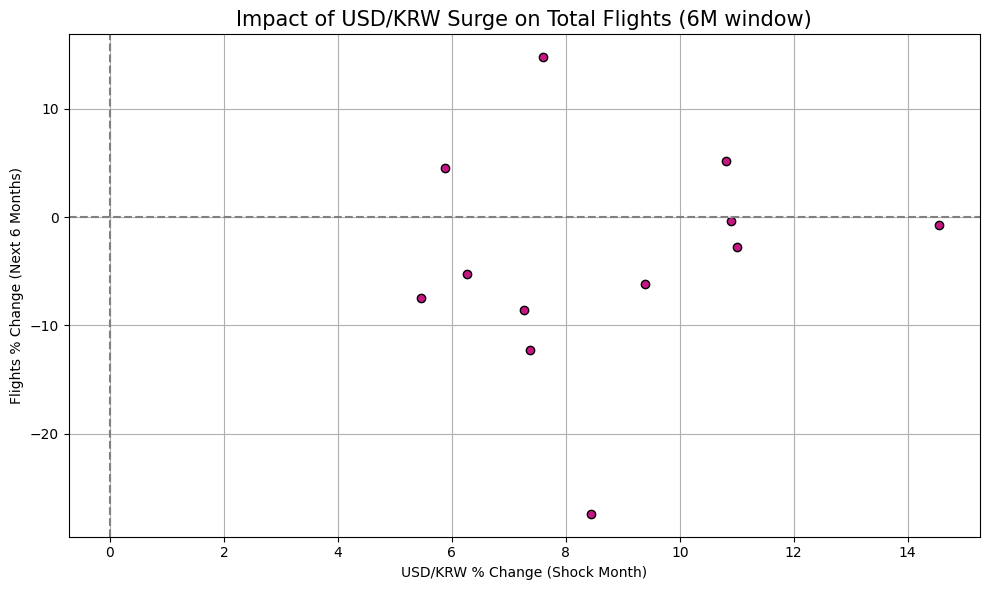

In [ ]:
# 6개월 반응 시각화

import matplotlib.pyplot as plt

# Scatter Plot (환율 급등폭 vs 6개월 관제량 변화율)
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_df.loc[sudden_increase_dates.index, 'USD_KRW_pct_change'],
    reaction_analysis_6m_df['Percent_Change(%)'],
    color='mediumvioletred', edgecolor='black'
)

plt.title('Impact of USD/KRW Surge on Total Flights (6M window)', fontsize=15)
plt.xlabel('USD/KRW % Change (Shock Month)')
plt.ylabel('Flights % Change (Next 6 Months)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


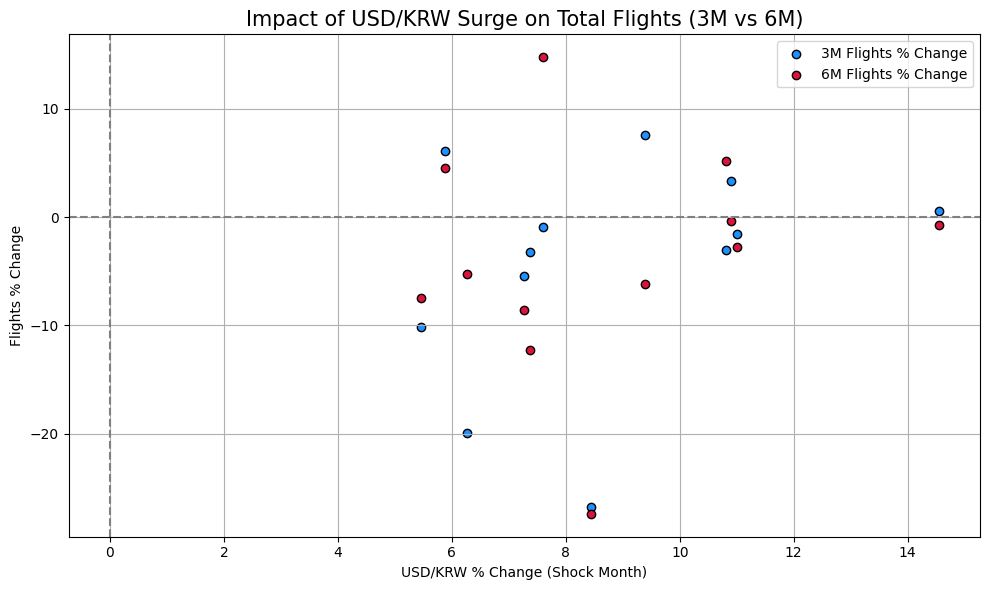

In [ ]:
import matplotlib.pyplot as plt

# 그래프 시작
plt.figure(figsize=(10, 6))

# 3개월 반응 (파란색)
plt.scatter(
    merged_df.loc[sudden_increase_dates.index, 'USD_KRW_pct_change'],
    reaction_analysis_df['Percent_Change(%)'],
    color='dodgerblue',
    edgecolor='black',
    label='3M Flights % Change'
)

# 6개월 반응 (빨간색)
plt.scatter(
    merged_df.loc[sudden_increase_dates.index, 'USD_KRW_pct_change'],
    reaction_analysis_6m_df['Percent_Change(%)'],
    color='crimson',
    edgecolor='black',
    label='6M Flights % Change'
)

# 기준선
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# 제목, 라벨
plt.title('Impact of USD/KRW Surge on Total Flights (3M vs 6M)', fontsize=15)
plt.xlabel('USD/KRW % Change (Shock Month)')
plt.ylabel('Flights % Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ARIMAX를 활용하여 예측 및 시각화

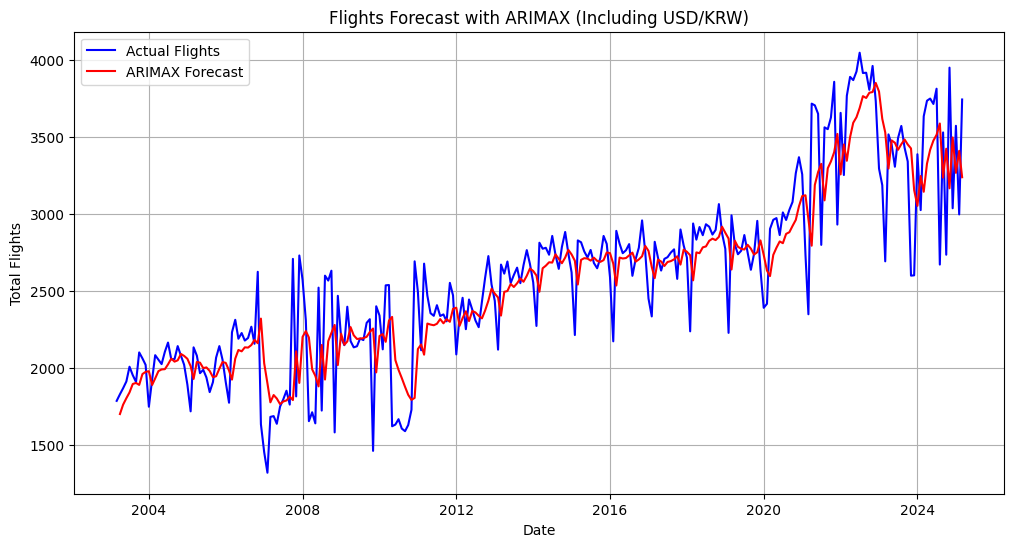

In [ ]:
# 필요한 라이브러리
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# 1. 데이터 준비 (merged_df: Date, flights, USD_KRW_Close)

# 2. 관제량 시계열 (y)와 환율 (exog)
y = merged_df['flights']
X = merged_df['USD_KRW_Close']

# 3. ARIMAX 모델 설정
model = SARIMAX(y, exog=X, order=(1, 1, 1))  # (p,d,q) 설정은 기본 1,1,1로 시작
model_fit = model.fit()

# 4. 예측
forecast = model_fit.predict(start=merged_df.index[1], end=merged_df.index[-1], exog=X[1:], dynamic=False)

# 5. 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], y, label='Actual Flights', color='blue')
plt.plot(merged_df['Date'][1:], forecast, label='ARIMAX Forecast', color='red')
plt.title('Flights Forecast with ARIMAX (Including USD/KRW)')
plt.xlabel('Date')
plt.ylabel('Total Flights')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. ARIMA (환율 없이) 모델
model_arima = SARIMAX(merged_df['flights'], order=(1, 1, 1))
result_arima = model_arima.fit()

# 2. ARIMAX (환율 넣은) 모델
model_arimax = SARIMAX(merged_df['flights'], exog=merged_df['USD_KRW_Close'], order=(1, 1, 1))
result_arimax = model_arimax.fit()

# 3. 예측
forecast_arima = result_arima.predict(start=merged_df.index[1], end=merged_df.index[-1])
forecast_arimax = result_arimax.predict(start=merged_df.index[1], end=merged_df.index[-1], exog=merged_df['USD_KRW_Close'][1:])

# 4. 성능 평가 (RMSE)
rmse_arima = np.sqrt(mean_squared_error(merged_df['flights'][1:], forecast_arima))
rmse_arimax = np.sqrt(mean_squared_error(merged_df['flights'][1:], forecast_arimax))

print(f'ARIMA (without USD/KRW) RMSE: {rmse_arima:.2f}')
print(f'ARIMAX (with USD/KRW) RMSE: {rmse_arimax:.2f}')

# 5. 환율(Coef) 계수 확인
print("\nARIMAX Coefficients:")
print(result_arimax.params)


ARIMA (without USD/KRW) RMSE: 299.66
ARIMAX (with USD/KRW) RMSE: 299.55

ARIMAX Coefficients:
USD_KRW_Close       -0.167056
ar.L1                0.170883
ma.L1               -0.826825
sigma2           89516.081565
dtype: float64
